In [1]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

绘制MPAS输出降水的时间序列，和CMORPH之间的对应，以及误差；便于说明问题绘制了分位数图<br>
因为CN05.1存在mask数据，因此需要对输出数据进行处理，用NCL+CDO来处理（在前一个文件夹，precip_preprocess中进行）<br>
2021.03.05<br>
    更新到进行气温数据的绘制
2021.03.31<br>
    此前的温度日数据有问题，下面是将diag1hr的进行处理之后的计算出的序列

In [2]:
# 读取数据
# year = "2006"
# 注释掉的是原始数据，此后的是进行了mask之后的数据
# dir_vr = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge/pre/" + "daily_pre_03-15.nc"
dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_mean_vr_03-15.nc"
ds_vr_mean = xr.open_dataset(dir_vr)

dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_max_vr_03-15.nc"
ds_vr_max = xr.open_dataset(dir_vr)

dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_min_vr_03-15.nc"
ds_vr_min = xr.open_dataset(dir_vr)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_mean_rcm_03-15.nc"
ds_rcm_mean = xr.open_dataset(dir_rcm)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_max_rcm_03-15.nc"
ds_rcm_max = xr.open_dataset(dir_rcm)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_min_rcm_03-15.nc"
ds_rcm_min = xr.open_dataset(dir_rcm)


obs_cn051_tm  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tm_1961_2018_daily_025x025.nc"
ds_cn051_tm = xr.open_dataset(obs_cn051_tm)
obs_cn051_tmax  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tmax_1961_2018_daily_025x025.nc"
ds_cn051_tmax = xr.open_dataset(obs_cn051_tmax)
obs_cn051_tmin  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tmin_1961_2018_daily_025x025.nc"
ds_cn051_tmin = xr.open_dataset(obs_cn051_tmin)

# ds_cn051_time_loc_year = (ds_cn051.time.dt.year >= 2003) & (ds_cn051.time.dt.year <= 2015)
# ds_cn051_time_loc_month= (ds_cn051.time.dt.month>=    4) & (ds_cn051.time.dt.month <= 8)
# ds_cn051_sel = ds_cn051_tm.isel(time = ds_cn051_time_loc_year & ds_cn051_time_loc_month)

# ds_cmorph
# precip_obs = ds_disk["precip_CMORPH"]
# precip_mod = ds_disk["precip_MPAS"]
vr_mean         = ds_vr_mean['t2m'].mean(dim=["longitude","latitude"])
vr_mean_max     = ds_vr_max['t2m'].mean(dim=["longitude","latitude"])
vr_mean_min     = ds_vr_min['t2m'].mean(dim=["longitude","latitude"])

rcm_mean        = ds_rcm_mean['t2m'].mean(dim=["longitude","latitude"])
rcm_mean_max    = ds_rcm_max['t2m'].mean(dim=["longitude","latitude"])
rcm_mean_min    = ds_rcm_min['t2m'].mean(dim=["longitude","latitude"])

cn051_tm_mean  = ds_cn051_tm['tm'].mean(dim=['lon','lat'])
cn051_tmax_mean  = ds_cn051_tmax['tmax'].mean(dim=['lon','lat'])
cn051_tmin_mean  = ds_cn051_tmin['tmin'].mean(dim=['lon','lat'])

vr_mean     = vr_mean - 273.15
vr_mean_max =vr_mean_max - 273.15
vr_mean_min =vr_mean_min - 273.15
rcm_mean    =rcm_mean - 273.15
rcm_mean_max    =rcm_mean_max - 273.15
rcm_mean_min    =rcm_mean_min - 273.15

In [37]:
dicttest = list(ds_cn051_tm['tm'].groupby(ds_cn051_tm.time.dt.year))

<xarray.DataArray 'tm' (time: 153, lat: 160, lon: 280)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2003-08-31
  * lon      (lon) float32 70.12 70.38 70.62 70.88 ... 139.1 139.4 139.6 139.9
  * lat      (lat) float32 15.12 15.38 15.62 15.88 ... 54.12 54.38 54.62 54.88
Attributes:
    long_name:  CN05.1 daily, mean temperature,c                             ...

_mean 是不同数据的时间序列，下面将进行不同的groupby，绘制具体的序列

In [3]:
# 针对 day 的groupby + mean (dayofyear)

cn051_tm_dayofyear = cn051_tm_mean.groupby('time.dayofyear').mean('time')
vr_tm_dayofyear = vr_mean.groupby('Time.dayofyear').mean('Time')
rcm_tm_dayofyear = rcm_mean.groupby('Time.dayofyear').mean('Time')

cn051_tmin_dayofyear = cn051_tmin_mean.groupby('time.dayofyear').mean('time')
vr_tmin_dayofyear = vr_mean_min.groupby('Time.dayofyear').mean('Time')
rcm_tmin_dayofyear = rcm_mean_min.groupby('Time.dayofyear').mean('Time')

cn051_tmax_dayofyear = cn051_tmax_mean.groupby('time.dayofyear').mean('time')
vr_tmax_dayofyear = vr_mean_max.groupby('Time.dayofyear').mean('Time')
rcm_tmax_dayofyear = rcm_mean_max.groupby('Time.dayofyear').mean('Time')

# 选取一个特定年份
# sel_year = 2006
# cn051_dayofyear  =  cn051_mean[cn051_mean.time.dt.year==sel_year]
# cmorph_dayofyear =  cmorph_mean[cmorph_mean.time.dt.year==sel_year]
# vr_dayofyear     =  vr_mean[vr_mean.Time.dt.year==sel_year]
# rcm_dayofyear    = rcm_mean.loc[rcm_mean.Time.dt.year==sel_year] # 使用 .loc 和直接使用相同，因为是用


In [4]:

# ds_vr['precip_MPAS'].Time[(ds_vr.Time.dt.month>=5) & (ds_vr.Time.dt.month<=7)]
time_idx = pd.date_range(start = "2012-04-01", end = "2012-08-31",freq='d')
time_idx
# ds_vr.sel(Time = time_idx)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10',
               ...
               '2012-08-22', '2012-08-23', '2012-08-24', '2012-08-25',
               '2012-08-26', '2012-08-27', '2012-08-28', '2012-08-29',
               '2012-08-30', '2012-08-31'],
              dtype='datetime64[ns]', length=153, freq='D')

In [5]:
# 将数据整理成pandas，准备绘图
df_cn051 = cn051_tm_dayofyear.to_dataframe()
df_vr  = vr_tm_dayofyear.to_dataframe()
df_rcm = rcm_tm_dayofyear.to_dataframe()

df_cn051_tmin = cn051_tmin_dayofyear.to_dataframe()
df_vr_tmin  = vr_tmin_dayofyear.to_dataframe()
df_rcm_tmin = rcm_tmin_dayofyear.to_dataframe()

df_cn051_tmax = cn051_tmax_dayofyear.to_dataframe()
df_vr_tmax  = vr_tmax_dayofyear.to_dataframe()
df_rcm_tmax = rcm_tmax_dayofyear.to_dataframe()
# rename df for plot
df_vr  = df_vr.rename(columns={"t2m":"vr"})
df_rcm = df_rcm.rename(columns={"t2m":"rcm"})
df_cn051 = df_cn051.rename(columns={"tm":"CN05.1"})

df_vr_tmin  = df_vr_tmin.rename(columns={"t2m_min":"vr_min"})
df_rcm_tmin = df_rcm_tmin.rename(columns={"t2m_min":"rcm_min"})
df_cn051_tmin = df_cn051_tmin.rename(columns={"tmin":"CN05.1_min"})

df_vr_tmax  = df_vr_tmax.rename(columns={"t2m_max":"vr_max"})
df_rcm_tmax = df_rcm_tmax.rename(columns={"t2m_max":"rcm_max"})
df_cn051_tmax = df_cn051_tmax.rename(columns={"tmax":"CN05.1_max"})


pd_plot = pd.concat([df_cn051, df_vr, df_rcm, df_cn051_tmin, df_vr_tmin, df_rcm_tmin\
    ,df_cn051_tmax, df_vr_tmax, df_rcm_tmax], axis=1)
pd_plot.tail()

,CN05.1,vr,rcm,CN05.1_min,t2m,t2m,CN05.1_max,t2m,t2m
dayofyear,,,,,,,,,
240,17.453531,18.309883,18.009035,12.758748,12.861147,13.025045,23.519329,23.557878,22.859380
241,17.172834,18.083955,17.789825,12.332297,12.557851,12.741077,23.347645,23.392333,22.698919
242,16.928141,17.849078,17.644886,12.007701,12.195426,12.581328,23.105976,23.264504,22.565972
243,16.741114,17.342971,17.552230,11.780954,11.673158,12.446192,22.972342,22.800033,22.544254
244,16.279997,16.891051,17.546147,11.378907,11.704296,12.486667,22.409575,22.019787,22.556241


<Figure size 576x576 with 0 Axes>

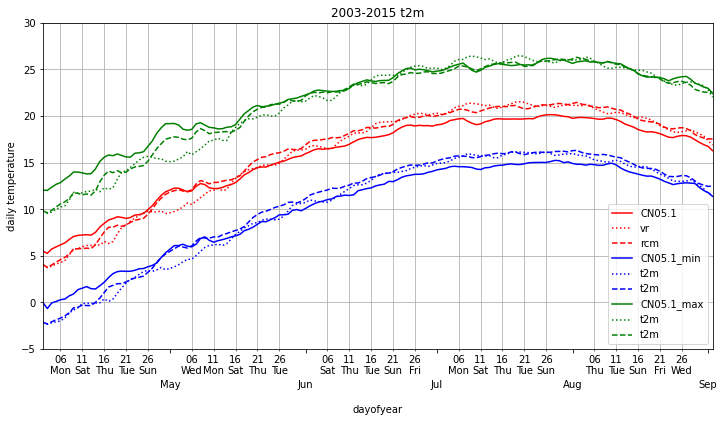

In [36]:
import matplotlib.dates as dates
import datetime
# pd_plot = pd.concat([df_obs, df_mod,minus], axis=1)
fig = plt.figure(figsize=(8,8))
# fig.patch.set_facecolor('white')
# fig,ax = plt.subplots(1,1,figsize=(16,16))
# fig.patch.set_facecolor('white') # 不使用，在输出图的facecolor调整颜色来更改输出的样式
ymin = -5.
ymax = 30.
# idx = pd.date_range("2003-"+'04-01', "2003-"+'09-01')
# s = pd.Series(np.random.randn(len(idx)), index=idx)

# fig, ax = plt.subplots()
# ax.plot_date(idx.to_pydatetime(), 'v-')
ax = pd_plot.plot(figsize=(12,6),style=['-r',':r','--r','-b',':b','--b','-g',':g','--g'])
# ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),
                                                # interval=1))
ax.patch.set_facecolor('black')

ax.set_facecolor('white')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(1, 31, 5) ))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b\n'))
# ax.set_xlim([datetime.date(2003, 4, 1), datetime.date(2003, 9, 1)])
ax.set_xlim([91,244])
# ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
# plt.tight_layout()
# plt.show()

# ax.spines['bottom'].set_color('#dddddd')
# ax.spines['top'].set_color('#dddddd') 
# ax.spines['right'].set_color('red')
# ax.spines['left'].set_color('red')

ax.set_ylabel("daily temperature")
plt.title("2003-2015 t2m")
plt.savefig("./output_pic/t2m_series_dayofyear.png", facecolor="white")